<img src="../masks/the_bar.png">
here is the part which we will focus on

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import cv2

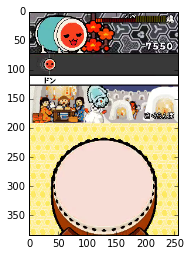

In [19]:
frame = io.imread('../extracted/out-58.png')
# right before you're supposed to hit it
plt.imshow(frame)
plt.show()

In [22]:
the_bar = io.imread('../masks/the_bar.png')
the_bar.shape

(128, 256, 4)

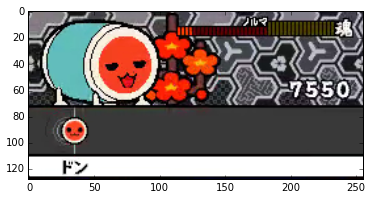

In [23]:
plt.imshow(frame[:128,:,:3])
plt.show()

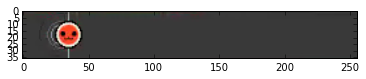

In [29]:
plt.imshow(frame[73:109,:,:])
# you can kinda tell that where the white line lines up with the drum is when you're supposed to hit

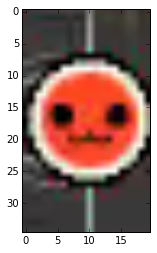

In [53]:
plt.imshow(frame[74:109,25:45,:])


(35, 3)


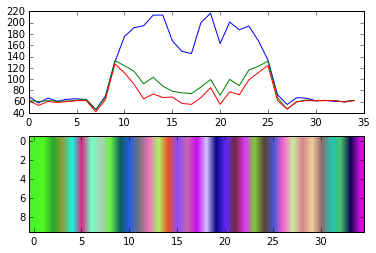

In [54]:
# let's figure out some average values of the columns somewhere around there
avg_col = np.average(frame[74:109,25:45,:3],axis=1)
print(avg_col.shape)
plt.subplot(2,1,1)
plt.plot(avg_col)
plt.subplot(2,1,2)
plt.imshow([avg_col]*10)

In [56]:
# lets get the column averages over a bunch of frames next
test_frames_avg_color = np.zeros([256,35,3])

In [57]:
for i in range(1,257):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    test_frames_avg_color[i-1] = np.average(testframe[74:109,25:45,:3],axis=1)


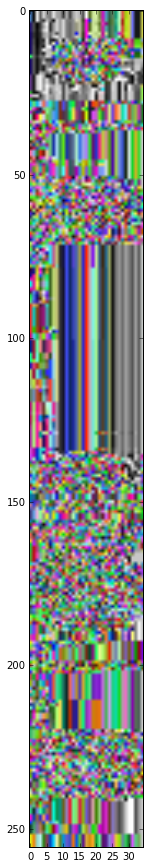

In [59]:
plt.figure(figsize=(5,15))
plt.imshow(test_frames_avg_color)

can see periods of no notes lmao, but that's it

let's try an average color inside of the circle

also take note that the white line appears only on the beginnings of measures

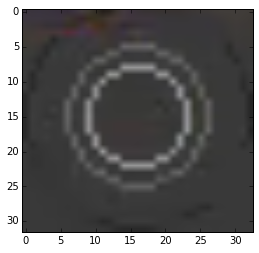

In [71]:
testframe = io.imread('../extracted/out-101.png')
plt.imshow(testframe[76:108,13:46,:3])

In [101]:
def bin_it(array_in,no_bins=4):
    no_bins = int(2 ** np.floor(np.log2(no_bins)))
    if no_bins >= 256:
        return array_in
    return np.floor_divide(array_in,256 / no_bins)

In [139]:
test_frames_avg_bin_color = np.zeros([256,32,3])
for i in range(1,257):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    test_frames_avg_bin_color[i-1] = bin_it(np.average(testframe[76:108,13:46,:3],axis=1),
                                            8)

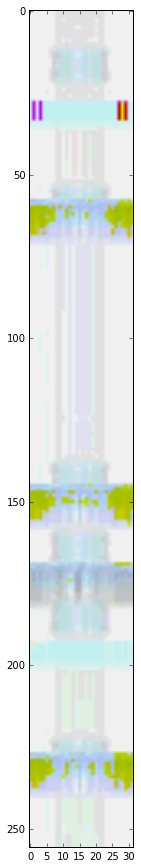

In [140]:
plt.figure(figsize=(5,15))
plt.imshow(test_frames_avg_bin_color*(256/16))

In [73]:
test_frames_avg_colorr = np.zeros([256,32,3])
for i in range(1,257):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    test_frames_avg_colorr[i-1] = np.average(testframe[76:108,13:46,:3],axis=1)

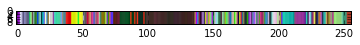

In [81]:
avg_color = np.average(test_frames_avg_colorr,axis=1)
plt.imshow([avg_color]*10)

In [86]:
unique_pixels = np.vstack({tuple(r) for r in avg_color.reshape(-1,3)})

In [89]:
unique_pixels.shape

(238, 3)

looks like this won't work.. need to discretize colors somehow  -.-

In [141]:
test_frames_avg_colorr_bin = np.zeros([256,32,3])
for i in range(1,257):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    test_frames_avg_colorr_bin[i-1] = np.average(testframe[76:108,13:46,:3],axis=1)

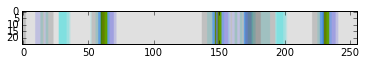

In [176]:
avg_color_bin = bin_it(np.average(test_frames_avg_colorr_bin,axis=1),8)
plt.imshow([avg_color_bin*256/8]*25)

In [151]:
# much better now
np.vstack({tuple(r) for r in avg_color_bin.reshape(-1,3)}).shape

(21, 3)

### now lets see if it correlates with good bad detection =)

In [152]:
from id_all import Recognizer

In [153]:
new_rec = Recognizer('../masks')

In [154]:
testframe = io.imread('../extracted/out-1.png')

In [155]:
new_rec.test_frame(testframe)

mess up !!


{'bad': False,
 'delta_score': 7550,
 'good': False,
 'messup': True,
 'okay': False,
 'score': 7550}

In [166]:
test_good_okay_bad = np.zeros([256,3])
new_rec.reset()
for i in range(1,257):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    res = new_rec.test_frame(testframe)
    if res['good']: test_good_okay_bad[i-1,1] = 1
    if res['okay']: test_good_okay_bad[i-1,2] = 1
    if res['bad']: test_good_okay_bad[i-1,0] = 1


mess up !!
mess up !!


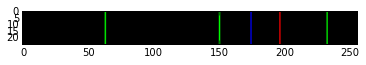

In [197]:
plt.imshow([test_good_okay_bad]*25)

In [192]:
test_good_okay_bad.shape

(256, 3)

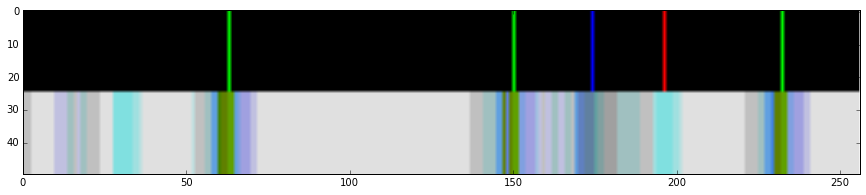

In [204]:
betterpic = np.zeros([2,256,3])
betterpic[0,:,:] = test_good_okay_bad
betterpic[1,:,:] = avg_color_bin*256/8
plt.figure(figsize=(15,5))
plt.xlim([0,256])
plt.imshow(np.repeat(betterpic,25,axis=0))
# plt.imshow([test_good_okay_bad,avg_color_bin]*25)

### looking good : )

In [210]:
# lets do for whole thing and vertically orient this time for sng
avg_color_binned = np.zeros([3250,3])
good_okay_bad_all = np.zeros([3250,3])
new_rec.reset()

for i in range(1,3251):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    avg_color_binned[i-1] =  bin_it(np.average(np.average(testframe[76:108,13:46,:3],axis=1),
                                               axis=0), 8)
    res = new_rec.test_frame(testframe)
    if res['good']: good_okay_bad_all[i-1,1] = 1
    if res['okay']: good_okay_bad_all[i-1,2] = 1
    if res['bad']: good_okay_bad_all[i-1,0] = 1


mess up !!
mess up !!
mess up !!
mess up !!


In [213]:
betterpic = np.zeros([2,3250,3])
betterpic[0,:,:] = good_okay_bad_all
betterpic[1,:,:] = avg_color_binned*256/8

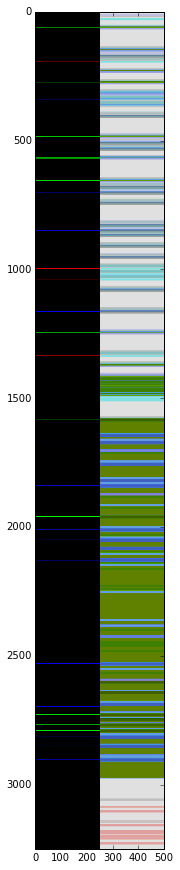

In [230]:
plt.figure(figsize=(5,15))
plt.imshow(np.repeat(np.swapaxes(betterpic,0,1),250,axis=1))


In [244]:
#hmm what if i do a slightly shifted window for avg color detection
avg_color_binned = np.zeros([512,3])
good_okay_bad_all = np.zeros([512,3])
new_rec.reset()

for i in range(1,513):
    filename = '../extracted/out-{}.png'.format(i)
    testframe = io.imread(filename)
    avg_color_binned[i-1] =  bin_it(np.average(np.average(testframe[76:108,13:46,:3],axis=1),
                                               axis=0), 8)
    res = new_rec.test_frame(testframe)
    if res['good']: good_okay_bad_all[i-1,1] = 1
    if res['okay']: good_okay_bad_all[i-1,2] = 1
    if res['bad']: good_okay_bad_all[i-1,0] = 1

mess up !!
mess up !!


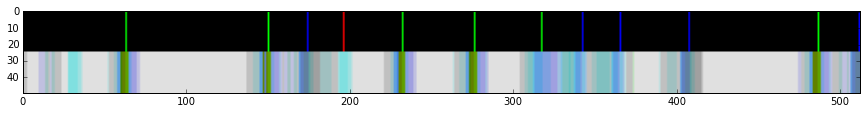

In [245]:
betterpic = np.zeros([2,512,3])
betterpic[0,:,:] = good_okay_bad_all
betterpic[1,:,:] = avg_color_binned*256/8
plt.figure(figsize=(15,5))
plt.xlim([0,512])
plt.imshow(np.repeat(betterpic,25,axis=0))

In [243]:
betterpicbackup = np.copy(betterpic)

In [246]:
bestpic = np.zeros([4,512,3])
bestpic[:2,:,:] = betterpic
bestpic[2:4,:,:] = betterpicbackup

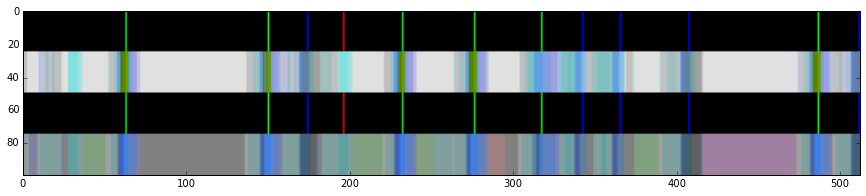

In [248]:
plt.figure(figsize=(15,5))
plt.xlim([0,512])
plt.imshow(np.repeat(bestpic,25,axis=0))

In [ ]:
# will have to play with the offset to get better predictive power (later on)